# Importação de Bibliotecas

In [147]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

# 1.0 Leitura dos arquivos

In [88]:
df = pd.read_csv('streamings.csv')
df.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,data
0,0,1,Recairei - Ao Vivo,Os Barões Da Pisadinha,1611265,https://open.spotify.com/track/2JTir3y1VuJQmex...,2021-01-01
1,1,2,Basta Você Me Ligar - Ao Vivo,Os Barões Da Pisadinha,1263779,https://open.spotify.com/track/3rRin3LyLY92kpE...,2021-01-01
2,2,3,Amor ou o Litrão,Petter Ferraz,1181284,https://open.spotify.com/track/7qmnP8Woc47dLSr...,2021-01-01
3,3,4,Meia Noite (Você tem meu Whatsapp),Tarcísio do Acordeon,1100935,https://open.spotify.com/track/6sPBi0qLI6KM3yX...,2021-01-01
4,4,5,Investe Em Mim,Jonas Esticado,1052844,https://open.spotify.com/track/15k1TDabqSEmyXO...,2021-01-01


In [3]:
df_features = pd.read_csv('audio_features.csv')
df_features

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,URL
0,0,0.582,0.937,10,-2.118,1,0.0858,0.449,0.000000,0.6840,0.939,168.096,audio_features,2JTir3y1VuJQmexiTCMcTP,spotify:track:2JTir3y1VuJQmexiTCMcTP,https://api.spotify.com/v1/tracks/2JTir3y1VuJQ...,https://api.spotify.com/v1/audio-analysis/2JTi...,166838,4,https://open.spotify.com/track/2JTir3y1VuJQmex...
1,1,0.599,0.914,5,-2.415,0,0.0629,0.500,0.000000,0.6940,0.831,168.008,audio_features,3rRin3LyLY92kpEbkCgwf4,spotify:track:3rRin3LyLY92kpEbkCgwf4,https://api.spotify.com/v1/tracks/3rRin3LyLY92...,https://api.spotify.com/v1/audio-analysis/3rRi...,182977,4,https://open.spotify.com/track/3rRin3LyLY92kpE...
2,2,0.934,0.707,9,-4.214,1,0.0646,0.437,0.000017,0.0628,0.961,138.023,audio_features,7qmnP8Woc47dLSrMD5MxL1,spotify:track:7qmnP8Woc47dLSrMD5MxL1,https://api.spotify.com/v1/tracks/7qmnP8Woc47d...,https://api.spotify.com/v1/audio-analysis/7qmn...,173913,4,https://open.spotify.com/track/7qmnP8Woc47dLSr...
3,3,0.709,0.816,11,-4.787,0,0.0346,0.685,0.000000,0.1460,0.921,150.060,audio_features,6sPBi0qLI6KM3yXX56NxsA,spotify:track:6sPBi0qLI6KM3yXX56NxsA,https://api.spotify.com/v1/tracks/6sPBi0qLI6KM...,https://api.spotify.com/v1/audio-analysis/6sPB...,237900,4,https://open.spotify.com/track/6sPBi0qLI6KM3yX...
4,4,0.632,0.953,9,-1.283,1,0.0325,0.317,0.000000,0.1250,0.798,160.061,audio_features,15k1TDabqSEmyXOwMq9RM7,spotify:track:15k1TDabqSEmyXOwMq9RM7,https://api.spotify.com/v1/tracks/15k1TDabqSEm...,https://api.spotify.com/v1/audio-analysis/15k1...,186533,4,https://open.spotify.com/track/15k1TDabqSEmyXO...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,1713,0.616,0.991,9,-2.529,1,0.2320,0.113,0.000000,0.2590,0.499,98.001,audio_features,6seovz6cwRWkN1NNAuE2gu,spotify:track:6seovz6cwRWkN1NNAuE2gu,https://api.spotify.com/v1/tracks/6seovz6cwRWk...,https://api.spotify.com/v1/audio-analysis/6seo...,268160,4,https://open.spotify.com/track/6seovz6cwRWkN1N...
1714,1714,0.872,0.845,10,-1.932,1,0.0915,0.533,0.000027,0.0418,0.961,140.009,audio_features,1OosuFhKograArfZ6JXedk,spotify:track:1OosuFhKograArfZ6JXedk,https://api.spotify.com/v1/tracks/1OosuFhKogra...,https://api.spotify.com/v1/audio-analysis/1Oos...,129240,4,https://open.spotify.com/track/1OosuFhKograArf...
1715,1715,0.487,0.925,7,-1.817,1,0.0690,0.280,0.000140,0.2520,0.853,164.026,audio_features,1Unc6luL5ueLO3t8I5YtpP,spotify:track:1Unc6luL5ueLO3t8I5YtpP,https://api.spotify.com/v1/tracks/1Unc6luL5ueL...,https://api.spotify.com/v1/audio-analysis/1Unc...,175291,4,https://open.spotify.com/track/1Unc6luL5ueLO3t...
1716,1716,0.556,0.888,5,-2.952,0,0.0916,0.465,0.000000,0.8930,0.523,167.823,audio_features,0FV4eVWzSAglihmcJPECiE,spotify:track:0FV4eVWzSAglihmcJPECiE,https://api.spotify.com/v1/tracks/0FV4eVWzSAgl...,https://api.spotify.com/v1/audio-analysis/0FV4...,144982,4,https://open.spotify.com/track/0FV4eVWzSAglihm...


# 2.0 Pré-processamento

Como vou medir popularidade? 
- Medir a popularidade diária numero de streams / numero de streams do top 200 do dia
- dividir a popularidade de todas as musicas pela maior popularidade do dia

- Achar data primeiro registro para cada musica
- fazer a média em 4 meses.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97000 entries, 0 to 96999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  97000 non-null  int64 
 1   Position    97000 non-null  int64 
 2   Track Name  96978 non-null  object
 3   Artist      96978 non-null  object
 4   Streams     97000 non-null  int64 
 5   URL         97000 non-null  object
 6   data        97000 non-null  object
dtypes: int64(3), object(4)
memory usage: 5.2+ MB


## 2.1 Transformando a coluna de data

In [90]:
df['data'] = df['data'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

In [91]:
#df = df.astype({"data":'date'})

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97000 entries, 0 to 96999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  97000 non-null  int64 
 1   Position    97000 non-null  int64 
 2   Track Name  96978 non-null  object
 3   Artist      96978 non-null  object
 4   Streams     97000 non-null  int64 
 5   URL         97000 non-null  object
 6   data        97000 non-null  object
dtypes: int64(3), object(4)
memory usage: 5.2+ MB


## 2.2 Coletando informações total de streams diárias e número de streams máximo diário.

In [93]:
lista_datas = df.data.unique()
l_datas = list(lista_datas)
l_datas
len(l_datas)

485

In [94]:
# Gravando o total de streams ocorridas diariamente
stream_diaria = []
maxima_stream_diaria = []

for i in l_datas:
    
    stream_diaria.append(df[(df['data']== i)].Streams.sum() )  
    maxima_stream_diaria.append( df[(df['data']== i)].Streams.max() )
    
    
df_aux = pd.DataFrame(list(zip(l_datas, stream_diaria,maxima_stream_diaria )),
               columns =['data', 'stream_diaria', 'maxima_dia'])
df_aux.head()

,data,stream_diaria,maxima_dia
0,2021-01-01,64826108,1611265
1,2021-01-02,43141064,873301
2,2021-01-03,41664509,806828
3,2021-01-04,34807998,717103
4,2021-01-05,34675953,715246


In [95]:
df = df.merge(df_aux, how='left', on='data')
df.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,data,stream_diaria,maxima_dia
0,0,1,Recairei - Ao Vivo,Os Barões Da Pisadinha,1611265,https://open.spotify.com/track/2JTir3y1VuJQmex...,2021-01-01,64826108,1611265
1,1,2,Basta Você Me Ligar - Ao Vivo,Os Barões Da Pisadinha,1263779,https://open.spotify.com/track/3rRin3LyLY92kpE...,2021-01-01,64826108,1611265
2,2,3,Amor ou o Litrão,Petter Ferraz,1181284,https://open.spotify.com/track/7qmnP8Woc47dLSr...,2021-01-01,64826108,1611265
3,3,4,Meia Noite (Você tem meu Whatsapp),Tarcísio do Acordeon,1100935,https://open.spotify.com/track/6sPBi0qLI6KM3yX...,2021-01-01,64826108,1611265
4,4,5,Investe Em Mim,Jonas Esticado,1052844,https://open.spotify.com/track/15k1TDabqSEmyXO...,2021-01-01,64826108,1611265


## 2.3 Calculando popularidade normalizada diária

In [96]:
df['popularidade_diaria_norm'] = df['Streams']/df['maxima_dia']
df.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,data,stream_diaria,maxima_dia,popularidade_diaria_norm
0,0,1,Recairei - Ao Vivo,Os Barões Da Pisadinha,1611265,https://open.spotify.com/track/2JTir3y1VuJQmex...,2021-01-01,64826108,1611265,1.000000
1,1,2,Basta Você Me Ligar - Ao Vivo,Os Barões Da Pisadinha,1263779,https://open.spotify.com/track/3rRin3LyLY92kpE...,2021-01-01,64826108,1611265,0.784340
2,2,3,Amor ou o Litrão,Petter Ferraz,1181284,https://open.spotify.com/track/7qmnP8Woc47dLSr...,2021-01-01,64826108,1611265,0.733141
3,3,4,Meia Noite (Você tem meu Whatsapp),Tarcísio do Acordeon,1100935,https://open.spotify.com/track/6sPBi0qLI6KM3yX...,2021-01-01,64826108,1611265,0.683274
4,4,5,Investe Em Mim,Jonas Esticado,1052844,https://open.spotify.com/track/15k1TDabqSEmyXO...,2021-01-01,64826108,1611265,0.653427


## 2.4 Calculando popularidade média em 4 meses após a entrada nos charts do spotify.

Será registrado apenas as músicas que entraram no charts pela primeira vez em 2021.  
Será contabilizado como 0 streams diário as músicas que entraram em algum momento nos charts do spotify mas não permaneceram no dia considerado

In [12]:
##Definindo lista de musicas unicas
lista_musicas = df.URL.unique()
l_musicas = list(lista_musicas)
l_musicas
len(l_musicas)

1719

In [16]:
#Definindo a janela para 4 meses (120 dias)
n_days = 120
diferenca = timedelta(n_days)
diferenca

datetime.timedelta(days=120)

In [17]:
#Criando looping para calcular a popularidade nos 4 primeiros meses que a musica entrou nos charts
popularidade_media_4m = []
desv_pad_4m = []
l_data_entrada =[]
l_data_final =[]
numero_registros = []

for i in l_musicas:
    
    #Data de entrada no charts
    data_entrada = df[(df['URL']== i)].data.min()

    
    #Data final a considerar o calculo (+120 dias)
    data_final_calculo = data_entrada + diferenca
    
    #Registrar estatísticas apenas caso a musica tenha dado entrada nos charts no ano de 2021.
    if data_entrada.year == 2021:
        
        l_data_entrada.append(data_entrada)
        l_data_final.append(data_final_calculo)
        
        df_filtro = df[(df['data']>= data_entrada) & (df['data']<= data_final_calculo) & (df['URL']== i)]
        
        n_reg = len(df_filtro)
        
        # É contabilizado como 0 streams o dia em que não há registro no top200 do charts, por isso se aplica o fator *n_reg/n_days
        pop_media = df_filtro.popularidade_diaria_norm.mean()*n_reg/n_days
        desv_pad = df_filtro.popularidade_diaria_norm.std()
    
        #Registrando as estatisticas
        popularidade_media_4m.append(pop_media)
        desv_pad_4m.append(desv_pad)
        numero_registros.append(n_reg)


# Transformando em dataframe:
df_aux = pd.DataFrame(list(zip(l_musicas,l_data_entrada,l_data_final,numero_registros, popularidade_media_4m,desv_pad_4m )),
               columns =['URL', 'data_entrada_charts','data_final_4m','n_registros','pop_media_4m', 'pop_desvpad_4m'])
df_aux

,URL,data_entrada_charts,data_final_4m,n_registros,pop_media_4m,pop_desvpad_4m
0,https://open.spotify.com/track/2JTir3y1VuJQmex...,2021-01-01,2021-05-01,121,0.513341,0.242721
1,https://open.spotify.com/track/3rRin3LyLY92kpE...,2021-01-01,2021-05-01,121,0.471690,0.165304
2,https://open.spotify.com/track/7qmnP8Woc47dLSr...,2021-01-01,2021-05-01,121,0.372351,0.231846
3,https://open.spotify.com/track/6sPBi0qLI6KM3yX...,2021-01-01,2021-05-01,121,0.624558,0.248782
4,https://open.spotify.com/track/15k1TDabqSEmyXO...,2021-01-01,2021-05-01,121,0.395960,0.175088
...,...,...,...,...,...,...
1377,https://open.spotify.com/track/7MJiZazhXeWZoFZ...,2021-12-29,2022-04-28,58,0.041164,0.007200
1378,https://open.spotify.com/track/2AQJRDfQJbfgmTf...,2021-12-31,2022-04-30,121,0.257113,0.045011
1379,https://open.spotify.com/track/67MzL6NnggPqvBf...,2021-12-31,2022-04-30,3,0.002563,0.014767
1380,https://open.spotify.com/track/7uHVSsfgVm7FpG7...,2021-12-31,2022-04-30,55,0.041144,0.011812


Das 1718 músicas coletadas apenas 1382 apareceram nos charts de 2021.

## 2.5 Investigando valores nulos para desvio padrão da popularidade média de 4 meses

In [18]:
df_aux.isnull().sum()

URL                      0
data_entrada_charts      0
data_final_4m            0
n_registros              0
pop_media_4m             0
pop_desvpad_4m         224
dtype: int64

In [19]:
bool_series = pd.isnull(df_aux["pop_desvpad_4m"])

In [20]:
df_aux[bool_series] 

,URL,data_entrada_charts,data_final_4m,n_registros,pop_media_4m,pop_desvpad_4m
112,https://open.spotify.com/track/4i9uK1cMwP1Pc5z...,2021-01-01,2021-05-01,1,0.001025,NaN
141,https://open.spotify.com/track/4nyQshn0cfaRvvn...,2021-01-01,2021-05-01,1,0.000883,NaN
147,https://open.spotify.com/track/2Zrcs0ePEBsZhsD...,2021-01-01,2021-05-01,1,0.000840,NaN
151,https://open.spotify.com/track/2bPtwnrpFNEe8N7...,2021-01-01,2021-05-01,1,0.000827,NaN
159,https://open.spotify.com/track/0gtf3d3byB1LJB8...,2021-01-01,2021-05-01,1,0.000794,NaN
...,...,...,...,...,...,...
1341,https://open.spotify.com/track/2ZbYyDM0pacTwP2...,2021-12-13,2022-04-12,1,0.001029,NaN
1352,https://open.spotify.com/track/58ySh8QZ67IDkD2...,2021-12-17,2022-04-16,1,0.001138,NaN
1363,https://open.spotify.com/track/0lizgQ7Qw35od7C...,2021-12-24,2022-04-23,1,0.000863,NaN
1365,https://open.spotify.com/track/0lLdorYw7lVrJyd...,2021-12-24,2022-04-23,1,0.000794,NaN


In [21]:
df_aux[bool_series].n_registros.value_counts()

1    224
Name: n_registros, dtype: int64

O desvio padrão de popularidade nula ocorreu para musicas com apenas 1 registro na janela específicada.  
A média de popularidade, dessa forma, tende a ser baixa conforme o esperado.

## 2.6 Concatenando caractéristicas e popularidade de músicas
* Características extraidas da WebAPI do Spotify: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-track
* Popularidade calculada de acordo com charts top200 diário do spotify. https://spotifycharts.com/regional/br/daily/latest


In [22]:
df_final = df_features.merge(df_aux, how='left', on='URL')
df_final

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,track_href,analysis_url,duration_ms,time_signature,URL,data_entrada_charts,data_final_4m,n_registros,pop_media_4m,pop_desvpad_4m
0,0,0.582,0.937,10,-2.118,1,0.0858,0.449,0.000000,0.6840,...,https://api.spotify.com/v1/tracks/2JTir3y1VuJQ...,https://api.spotify.com/v1/audio-analysis/2JTi...,166838,4,https://open.spotify.com/track/2JTir3y1VuJQmex...,2021-01-01,2021-05-01,121.0,0.513341,0.242721
1,1,0.599,0.914,5,-2.415,0,0.0629,0.500,0.000000,0.6940,...,https://api.spotify.com/v1/tracks/3rRin3LyLY92...,https://api.spotify.com/v1/audio-analysis/3rRi...,182977,4,https://open.spotify.com/track/3rRin3LyLY92kpE...,2021-01-01,2021-05-01,121.0,0.471690,0.165304
2,2,0.934,0.707,9,-4.214,1,0.0646,0.437,0.000017,0.0628,...,https://api.spotify.com/v1/tracks/7qmnP8Woc47d...,https://api.spotify.com/v1/audio-analysis/7qmn...,173913,4,https://open.spotify.com/track/7qmnP8Woc47dLSr...,2021-01-01,2021-05-01,121.0,0.372351,0.231846
3,3,0.709,0.816,11,-4.787,0,0.0346,0.685,0.000000,0.1460,...,https://api.spotify.com/v1/tracks/6sPBi0qLI6KM...,https://api.spotify.com/v1/audio-analysis/6sPB...,237900,4,https://open.spotify.com/track/6sPBi0qLI6KM3yX...,2021-01-01,2021-05-01,121.0,0.624558,0.248782
4,4,0.632,0.953,9,-1.283,1,0.0325,0.317,0.000000,0.1250,...,https://api.spotify.com/v1/tracks/15k1TDabqSEm...,https://api.spotify.com/v1/audio-analysis/15k1...,186533,4,https://open.spotify.com/track/15k1TDabqSEmyXO...,2021-01-01,2021-05-01,121.0,0.395960,0.175088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,1713,0.616,0.991,9,-2.529,1,0.2320,0.113,0.000000,0.2590,...,https://api.spotify.com/v1/tracks/6seovz6cwRWk...,https://api.spotify.com/v1/audio-analysis/6seo...,268160,4,https://open.spotify.com/track/6seovz6cwRWkN1N...,NaN,NaN,NaN,NaN,NaN
1714,1714,0.872,0.845,10,-1.932,1,0.0915,0.533,0.000027,0.0418,...,https://api.spotify.com/v1/tracks/1OosuFhKogra...,https://api.spotify.com/v1/audio-analysis/1Oos...,129240,4,https://open.spotify.com/track/1OosuFhKograArf...,NaN,NaN,NaN,NaN,NaN
1715,1715,0.487,0.925,7,-1.817,1,0.0690,0.280,0.000140,0.2520,...,https://api.spotify.com/v1/tracks/1Unc6luL5ueL...,https://api.spotify.com/v1/audio-analysis/1Unc...,175291,4,https://open.spotify.com/track/1Unc6luL5ueLO3t...,NaN,NaN,NaN,NaN,NaN
1716,1716,0.556,0.888,5,-2.952,0,0.0916,0.465,0.000000,0.8930,...,https://api.spotify.com/v1/tracks/0FV4eVWzSAgl...,https://api.spotify.com/v1/audio-analysis/0FV4...,144982,4,https://open.spotify.com/track/0FV4eVWzSAglihm...,NaN,NaN,NaN,NaN,NaN


Exclusão das músicas que entraram nos charts após 2021. Essas musicas não possuem popularidade calculada então:

df_final = df_final.dropna(subset=['pop_media_4m'])
df_final

## 2.7 Estatísticas descritivas

In [27]:
df_final.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,n_registros,pop_media_4m,pop_desvpad_4m
count,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1158.000000
mean,690.000000,0.670534,0.679165,5.360608,-5.619235,0.558291,0.106225,0.344591,0.009505,0.240155,0.616318,130.027742,189726.995655,3.986966,45.526430,0.087402,0.048057
std,398.804672,0.134604,0.172006,3.548874,2.657069,0.496770,0.105523,0.235599,0.071811,0.232130,0.233127,28.625400,60175.066381,0.282029,46.457931,0.138763,0.051608
min,0.000000,0.161000,0.022900,0.000000,-28.325000,0.000000,0.024800,0.000110,0.000000,0.013400,0.032000,52.989000,37801.000000,1.000000,1.000000,0.000553,0.000019
25%,345.000000,0.594000,0.564000,2.000000,-6.999000,0.000000,0.043100,0.152000,0.000000,0.095900,0.450000,109.991000,158531.000000,4.000000,3.000000,0.003138,0.014671
50%,690.000000,0.672000,0.700000,6.000000,-5.260000,1.000000,0.062700,0.317000,0.000000,0.132000,0.637000,129.999000,177813.000000,4.000000,23.000000,0.024037,0.028391
75%,1035.000000,0.762000,0.815000,8.000000,-3.846000,1.000000,0.122000,0.524000,0.000006,0.313000,0.808000,153.248000,206182.000000,4.000000,91.000000,0.110264,0.061643
max,1380.000000,0.964000,0.986000,11.000000,1.906000,1.000000,0.879000,0.974000,0.971000,0.989000,0.975000,204.319000,744727.000000,5.000000,121.000000,0.819723,0.327077


# 3.0 EDA

Como definir uma musica popular?  
 - Classificar musicas popularidade em 25,50,75,100 percentis e verificar o comportamento da popularidade normalizada ao longo do tempo nas charts.  
 
 Gráfico de distribuição popularidade de musicas;  
 Distribuição caracteristicas de acordo com o que considerar popular (labels)  


## 3.1 Correlação

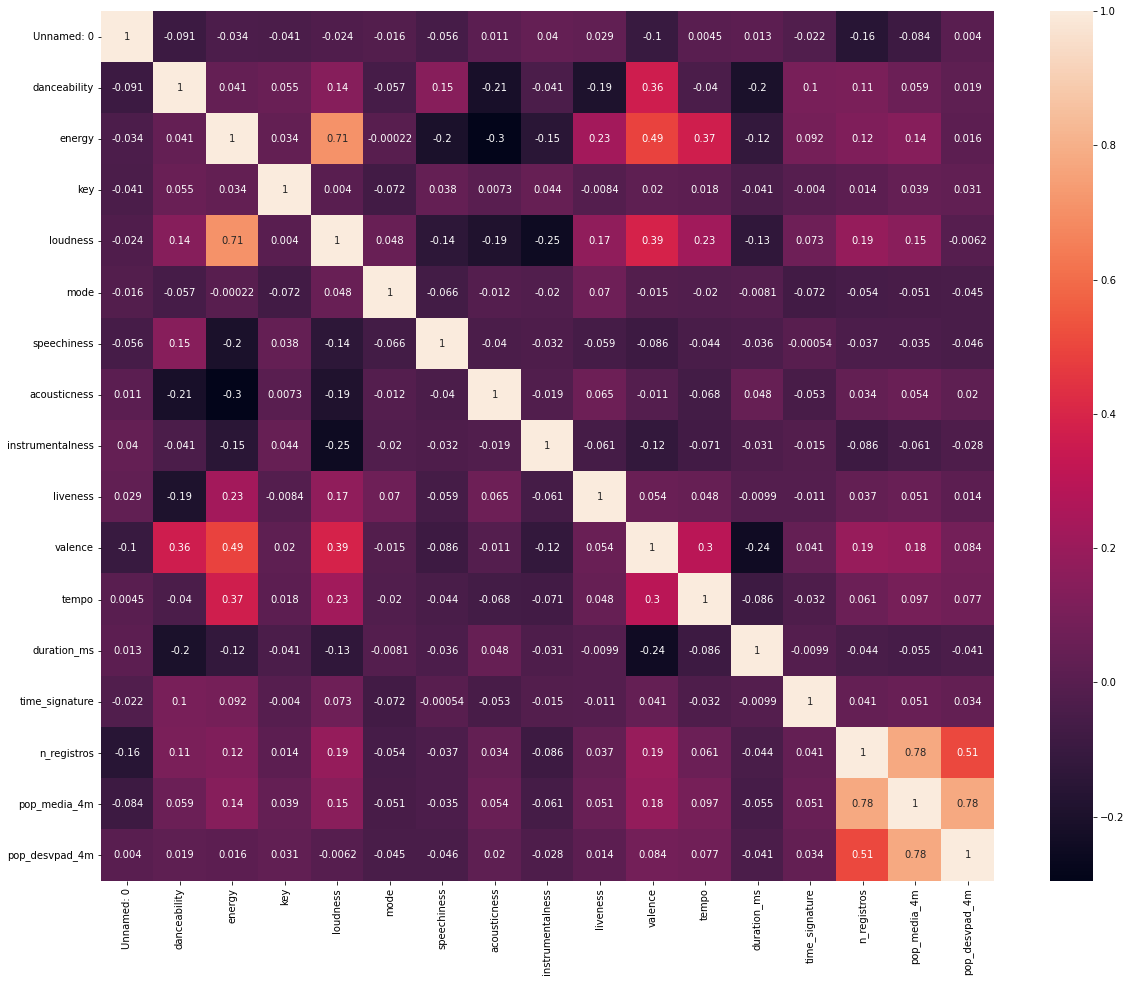

In [33]:
plt.figure(figsize=(20,16))
sns.heatmap(df_final.corr(),annot=True)
plt.show()

Há baixa correlação entre a variável alvo e as características, sendo o máximo observado de 0.19 entre popularidade e valence da música;

É importante ressaltar que as variáveis "n_registros" e "desv_pad" da popularidade foram calculados a partir dos charts do spotify, portanto, não será usado no modelo.

## Quartis e percentis

In [140]:
print('Quartil 25%: {}' .format(df_final.quantile(0.25, numeric_only=True).pop_media_4m));
print('Quartil 50%: {}' .format(df_final.quantile(0.5, numeric_only=True).pop_media_4m));
print('Quartil 75%: {}' .format(df_final.quantile(0.75, numeric_only=True).pop_media_4m));
print('Percentil 90%: {}' .format(df_final.quantile(0.9, numeric_only=True).pop_media_4m));

Quartil 25%: 0.0031375944094730415
Quartil 50%: 0.024036977377076194
Quartil 75%: 0.1102641089322164
Percentil 90%: 0.25711297294115504


1º Quartil: pop <= 0.0031375944094730415;  
2º Quartil: 0.0031375944094730415 < pop <= 0.024036977377076194;  
3º Quartil: 0.024036977377076194 < pop <= 0.1102641089322164;  
4º Quartil: pop > 0.1102641089322164

## Definição de musica popular: Percentil 90%

Definiremos o percentil de 90% como musicas populares com label = 1

In [141]:
df_analise = df_final.copy()
df_analise['classe'] = 'NaN'

for index, row in df_analise.iterrows():
        
    #if row['pop_media_4m'] <= 0.0031375944094730415:
        #df_analise.loc[index,'classe'] =  0
   #elif row['pop_media_4m'] > 0.0031375944094730415 and row['pop_media_4m'] <= 0.024036977377076194:
        #df_analise.loc[index,'classe'] =  0
    #elif row['pop_media_4m'] > 0.024036977377076194 and row['pop_media_4m'] <= 0.1102641089322164:
        #df_analise.loc[index,'classe'] =  0
    #elif row['pop_media_4m'] > 0.1102641089322164:
        #df_analise.loc[index,'classe'] =  1
        
    if row['pop_media_4m'] >= 0.25711297294115504:
        df_analise.loc[index,'classe'] =  1
    else:
        df_analise.loc[index,'classe'] =  0
         
df_analise

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,analysis_url,duration_ms,time_signature,URL,data_entrada_charts,data_final_4m,n_registros,pop_media_4m,pop_desvpad_4m,classe
0,0,0.582,0.937,10,-2.118,1,0.0858,0.4490,0.000000,0.6840,...,https://api.spotify.com/v1/audio-analysis/2JTi...,166838,4,https://open.spotify.com/track/2JTir3y1VuJQmex...,2021-01-01,2021-05-01,121.0,0.513341,0.242721,1
1,1,0.599,0.914,5,-2.415,0,0.0629,0.5000,0.000000,0.6940,...,https://api.spotify.com/v1/audio-analysis/3rRi...,182977,4,https://open.spotify.com/track/3rRin3LyLY92kpE...,2021-01-01,2021-05-01,121.0,0.471690,0.165304,1
2,2,0.934,0.707,9,-4.214,1,0.0646,0.4370,0.000017,0.0628,...,https://api.spotify.com/v1/audio-analysis/7qmn...,173913,4,https://open.spotify.com/track/7qmnP8Woc47dLSr...,2021-01-01,2021-05-01,121.0,0.372351,0.231846,1
3,3,0.709,0.816,11,-4.787,0,0.0346,0.6850,0.000000,0.1460,...,https://api.spotify.com/v1/audio-analysis/6sPB...,237900,4,https://open.spotify.com/track/6sPBi0qLI6KM3yX...,2021-01-01,2021-05-01,121.0,0.624558,0.248782,1
4,4,0.632,0.953,9,-1.283,1,0.0325,0.3170,0.000000,0.1250,...,https://api.spotify.com/v1/audio-analysis/15k1...,186533,4,https://open.spotify.com/track/15k1TDabqSEmyXO...,2021-01-01,2021-05-01,121.0,0.395960,0.175088,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,1376,0.829,0.619,1,-0.861,0,0.2040,0.1860,0.028300,0.1180,...,https://api.spotify.com/v1/audio-analysis/7MJi...,193846,3,https://open.spotify.com/track/7MJiZazhXeWZoFZ...,2021-12-29,2022-04-28,58.0,0.041164,0.007200,0
1377,1377,0.612,0.661,5,-5.175,0,0.1330,0.1630,0.000000,0.1030,...,https://api.spotify.com/v1/audio-analysis/2AQJ...,267130,3,https://open.spotify.com/track/2AQJRDfQJbfgmTf...,2021-12-31,2022-04-30,121.0,0.257113,0.045011,1
1378,1378,0.810,0.700,7,-7.154,1,0.0579,0.0669,0.000001,0.0749,...,https://api.spotify.com/v1/audio-analysis/67Mz...,145953,4,https://open.spotify.com/track/67MzL6NnggPqvBf...,2021-12-31,2022-04-30,3.0,0.002563,0.014767,0
1379,1379,0.941,0.751,2,-2.799,1,0.0973,0.1540,0.000026,0.0677,...,https://api.spotify.com/v1/audio-analysis/7uHV...,126380,4,https://open.spotify.com/track/7uHVSsfgVm7FpG7...,2021-12-31,2022-04-30,55.0,0.041144,0.011812,0


In [145]:
df_analise['classe'].value_counts()

0    1242
1     139
Name: classe, dtype: int64

139 musicas serão consideradas populares

# Histogramas

In [148]:
df_analise.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'URL', 'data_entrada_charts',
       'data_final_4m', 'n_registros', 'pop_media_4m', 'pop_desvpad_4m',
       'classe'],
      dtype='object')

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


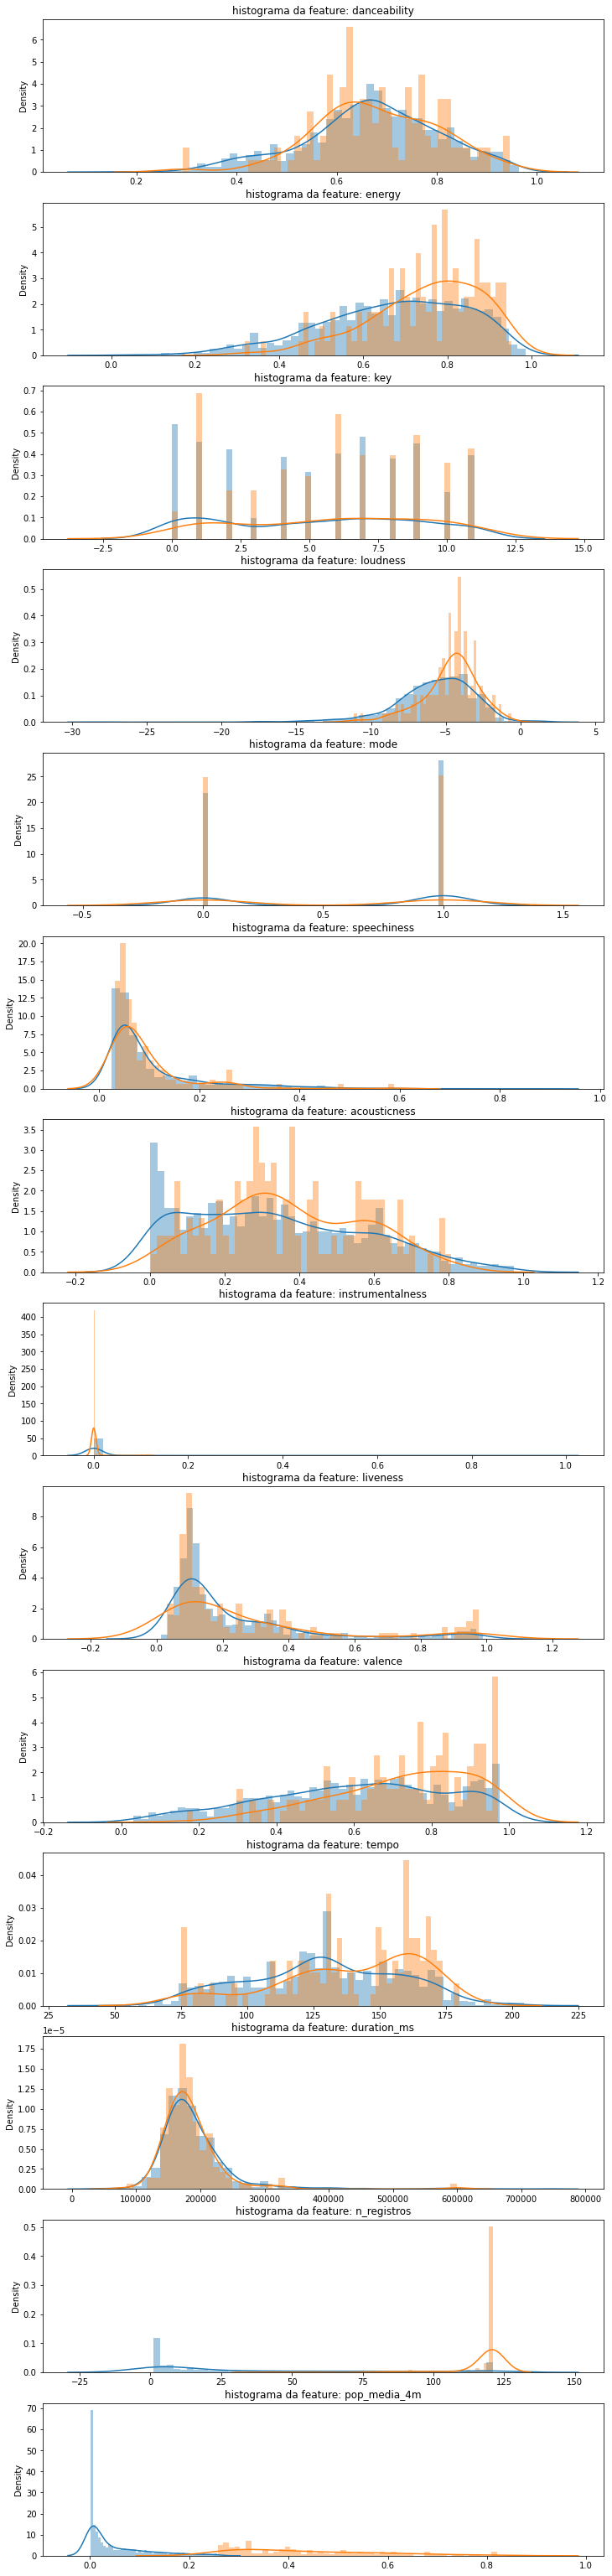

In [146]:
import matplotlib.gridspec as gridspec

features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms','n_registros','pop_media_4m']

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)

for i, cn in enumerate(df_analise[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df_analise[cn][df_analise.classe == 0], bins=50)
    sns.distplot(df_analise[cn][df_analise.classe == 1], bins=50)
    ax.set_xlabel('')
    ax.set_title('histograma da feature: ' + str(cn))
plt.show()